<a href="https://colab.research.google.com/github/arunsk03/arunsk03/blob/main/KNN%20ML%20Intermidiate.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Import Libraries**

In [29]:
import numpy as np # linear algebra 
import pandas as pd # data processing 
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline 

**Import** **Data**

In [30]:
glass = pd.read_csv ("https://raw.githubusercontent.com/insaid2018/Term-3/master/Data/CaseStudy/glass.csv")
glass.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


Shape of **Data**

In [31]:
glass.shape

(214, 10)

In [7]:
! pip install pandas-profiling==2.5.0

     |████████████████████████████████| 192 kB 5.2 MB/s 
     |████████████████████████████████| 10.4 MB 43.1 MB/s 
     |████████████████████████████████| 126 kB 40.6 MB/s 
     |████████████████████████████████| 607 kB 42.3 MB/s 
     |████████████████████████████████| 1.5 MB 37.6 MB/s 
     |████████████████████████████████| 59 kB 5.9 MB/s 
     |████████████████████████████████| 58 kB 5.7 MB/s 
     |████████████████████████████████| 121 kB 42.5 MB/s 
     |████████████████████████████████| 57 kB 5.2 MB/s 
     |████████████████████████████████| 296 kB 45.7 MB/s 
     |████████████████████████████████| 58 kB 5.6 MB/s 
     |████████████████████████████████| 414 kB 46.7 MB/s 
     |████████████████████████████████| 254 kB 50.0 MB/s 
     |████████████████████████████████| 103 kB 48.2 MB/s 
     |████████████████████████████████| 843 kB 42.0 MB/s 
     |████████████████████████████████| 57 kB 5.2 MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.5.0-py2.py3-none

In [7]:
!pip install numpy==1.16.5

     |████████████████████████████████| 17.3 MB 251 kB/s 
  Attempting uninstall: numpy
    Found existing installation: numpy 1.21.5
    Uninstalling numpy-1.21.5:
      Successfully uninstalled numpy-1.21.5
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.
xarray 0.18.2 requires numpy>=1.17, but you have numpy 1.16.5 which is incompatible.
xarray 0.18.2 requires pandas>=1.0, but you have pandas 0.25.3 which is incompatible.
tensorflow 2.8.0 requires numpy>=1.20, but you have numpy 1.16.5 which is incompatible.
tables 3.7.0 requires numpy>=1.19.0, but you have numpy 1.16.5 which is incompatible.
pywavelets 1.2.0 requires numpy>=1.17.3, but you have numpy 1.16.5 which is incompatible.
pyerfa 2.0.0.1 requires numpy>=1.17, but you have numpy 1.16.5 which is incompatible.
py

In [32]:
#pands profiling 
from pandas_profiling import ProfileReport 
profile = ProfileReport(glass, title="Pandas Profiling Report")
profile.to_file("your_report.html")

In [ ]:
#Observations from PF
#if all are Numerical continuos ==> sclaing or normalization 
#Real Number in PF signifies Numerical Continuos 
#There seems to be some imbalance 
#Kurtosis ==> Accepatable Range is [-5,5] -> Peakness -> Bias on certain value range 
#Skew ==> [-1,1]  - High Skew 

#Actions 
#Log of Column to address skew and kurtosis 

# column NA
#kurtosis and skew are fine
#on a hihg level each point has a capacity to be 0.8 unit from the mean value 
#


**Data Visualization**


Count the number of observations on the basis of type and then create a barplot

In [33]:
type=glass['Type'].groupby(glass['Type']).count()
type

Type
1    70
2    76
3    17
5    13
6     9
7    29
Name: Type, dtype: int64

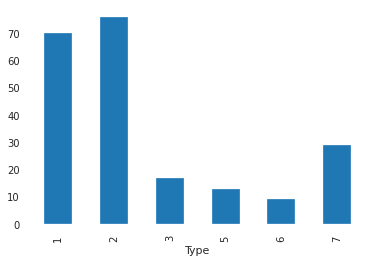

In [34]:
type.plot('bar')

**Data Standardization**

**Compute the skewness of the data**

In [35]:
glass.skew()

RI      1.625431
Na      0.454181
Mg     -1.152559
Al      0.907290
Si     -0.730447
K       6.551648
Ca      2.047054
Ba      3.416425
Fe      1.754327
Type    1.114915
dtype: float64

**Using StandardScaler to Standardize the data**

In [36]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

label = glass.pop('Type')

sc.fit(glass)                                                          #fit the data to standardscaler

glass_scale = sc.transform(glass)                                           #transforms the data

print('After Standardizing our features, the first 5 rows of our data now looke like this:\n')
print(pd.DataFrame(glass_scale, columns=glass.columns).head())



After Standardizing our features, the first 5 rows of our data now looke like this:

         RI        Na        Mg  ...        Ca        Ba        Fe
0  0.872868  0.284953  1.254639  ... -0.145766 -0.352877 -0.586451
1 -0.249333  0.591817  0.636168  ... -0.793734 -0.352877 -0.586451
2 -0.721318  0.149933  0.601422  ... -0.828949 -0.352877 -0.586451
3 -0.232831 -0.242853  0.698710  ... -0.519052 -0.352877 -0.586451
4 -0.312045 -0.169205  0.650066  ... -0.624699 -0.352877 -0.586451

[5 rows x 9 columns]


In [37]:
#how do i get back to original scales
df = pd.DataFrame(glass_scale, columns=glass.columns).head()
sc.inverse_transform(df)

array([[1.52101e+00, 1.36400e+01, 4.49000e+00, 1.10000e+00, 7.17800e+01,
        6.00000e-02, 8.75000e+00, 0.00000e+00, 0.00000e+00],
       [1.51761e+00, 1.38900e+01, 3.60000e+00, 1.36000e+00, 7.27300e+01,
        4.80000e-01, 7.83000e+00, 0.00000e+00, 0.00000e+00],
       [1.51618e+00, 1.35300e+01, 3.55000e+00, 1.54000e+00, 7.29900e+01,
        3.90000e-01, 7.78000e+00, 0.00000e+00, 0.00000e+00],
       [1.51766e+00, 1.32100e+01, 3.69000e+00, 1.29000e+00, 7.26100e+01,
        5.70000e-01, 8.22000e+00, 0.00000e+00, 0.00000e+00],
       [1.51742e+00, 1.32700e+01, 3.62000e+00, 1.24000e+00, 7.30800e+01,
        5.50000e-01, 8.07000e+00, 0.00000e+00, 0.00000e+00]])

**Train-Test-Split**

In [40]:
from sklearn.model_selection import train_test_split
data_train, data_test, label_train, label_test = train_test_split(glass_scale, label, test_size =0.2, random_state =42)

Random State - It does the random for the first time and then remembers the randomness so as to get the same operation when run again, helps in reproducibility. 42 

**Modelling and Prediction**

**Instantiate K nearest neighbour classifier **

In [55]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=7, p=2, metric='minkowski')

**Fit the Model**

In [56]:
knn.fit(data_train,label_train)

KNeighborsClassifier(n_neighbors=7)

**Use the model for prediction**

In [57]:
y_preds = knn.predict(data_test)

**Model evaluation using accuracy score **

In [58]:
from sklearn.metrics import accuracy_score
knn_accuracy =accuracy_score(label_test,y_preds)
print('Accuracy Score for the KNN Model:', knn_accuracy)

Accuracy Score for the KNN Model: 0.7209302325581395
